In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
#PREGUNTA 1:Utilice yfinance para extraer datos bursátiles

#Restablezca el índice, guarde y visualice las cinco primeras filas del marco de datos tesla_data utilizando la función head.

# Crear un objeto para Tesla utilizando su símbolo de acción (TSLA)
tesla = yf.Ticker("TSLA")

# Extraer los datos históricos de Tesla
tesla_data = tesla.history(period="max")

# Restablecer el índice del DataFrame
tesla_data.reset_index(inplace=True)

# Mostrar las primeras 5 filas del DataFrame
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [12]:
# Descarga del archivo HTML desde la URL proporcionada
url_tesla = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url_tesla)
html_data = response.text

# Parsear el contenido HTML
soup = BeautifulSoup(html_data, "html.parser")

# Extraer la tabla de ingresos
try:
    # Leer la tabla usando pandas
    tesla_revenue = pd.read_html(str(soup))[0]

    # Renombrar columnas para mayor claridad
    tesla_revenue.columns = ["Date", "Revenue"]

    # Limpiar la columna de ingresos (eliminar comas y símbolos de $)
    tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)

    # Eliminar filas vacías y valores faltantes
    tesla_revenue.dropna(inplace=True)
    tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

    # Convertir la columna de ingresos a valores numéricos
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)

    # Mostrar las últimas cinco filas
    print(tesla_revenue.tail())
except Exception as e:
    print(f"Error al procesar los datos: {e}")



    Date  Revenue
8   2013   2013.0
9   2012    413.0
10  2011    204.0
11  2010    117.0
12  2009    112.0


<ipython-input-12-77baab29ab98>:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(soup))[0]


In [13]:
# Crear un objeto para GameStop utilizando su símbolo de acción (GME)
gme = yf.Ticker("GME")

# Extraer los datos históricos
gme_data = gme.history(period="max")

# Restablecer el índice del DataFrame
gme_data.reset_index(inplace=True)

# Mostrar las primeras 5 filas del DataFrame
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578048  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [16]:
# Descarga
url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url_gme)
html_data_2 = response.text

# Parsear el HTML
soup = BeautifulSoup(html_data_2, "html.parser")

# Extraer la tabla
gme_revenue = pd.read_html(str(soup))[0]

#Quitar la coma y el signo de dólar de la columna. Revenue
gme_revenue.columns = ["Date", "Revenue"]

#Quitar cadenas nulas o vacías en la columna Ingresos.
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",|\$", "", regex=True)

#Últimas cinco filas
print(gme_revenue.tail())






    Date Revenue
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


<ipython-input-16-1c175a9e76ba>:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(soup))[0]


In [19]:
import matplotlib.pyplot as plt

# Definir la función make_graph
def make_graph(data, x_column, y_column, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data[x_column], data[y_column], label=y_column, color='blue')
    plt.title(title, fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Price (USD)", fontsize=12)
    plt.grid()
    plt.legend()
    plt.show()




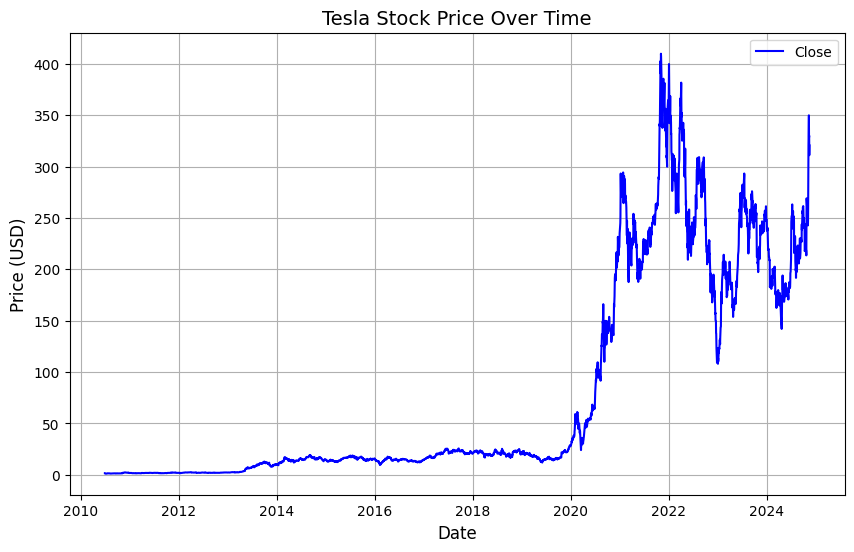

In [20]:
# Graficar el precio de las acciones de Tesla
make_graph(
    tesla_data,          # DataFrame de los datos de Tesla
    "Date",              # Columna para el eje x
    "Close",             # Columna para el eje y
    "Tesla Stock Price Over Time"  # Título del gráfico
)

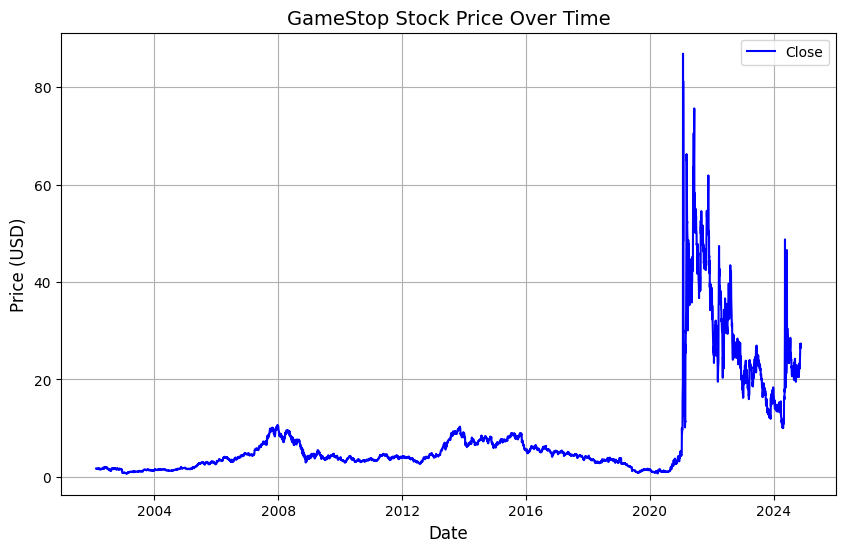

In [22]:
# Definir la función make_graph (si aún no está definida en el cuaderno)
def make_graph(data, x_column, y_column, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data[x_column], data[y_column], label=y_column, color='blue')
    plt.title(title, fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Price (USD)", fontsize=12)
    plt.grid()
    plt.legend()
    plt.show()

# Graficar el precio de las acciones de GameStop
make_graph(
    gme_data,            # DataFrame con los datos de GameStop
    "Date",              # Columna para el eje x
    "Close",             # Columna para el eje y
    "GameStop Stock Price Over Time"  # Título del gráfico
)
